# Introduction
ARIMA (AutoRegressive Integrated Moving Average) model is a popular time series analysis and forecasting method used in econometrics, finance, and other fields. It is a class of statistical models that captures the stochastic nature of a time series and its underlying patterns.

The ARIMA model has three components:

Autoregression (AR) - A regression model that uses lagged values of the time series to predict its current value.

Moving Average (MA) - A model that uses the past errors of the time series to predict its current value.

Integration (I) - A differencing process that transforms a non-stationary time series into a stationary one by computing the differences between consecutive observations.

The notation for an ARIMA model is ARIMA(p, d, q), where:

* p: the order of the autoregressive part
* d: the degree of differencing
* q: the order of the moving average part

The selection of the values for p, d, and q is typically done using statistical methods such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Once the optimal values for p, d, and q are determined, the ARIMA model can be used to make predictions about future values of the time series. 

### Assumptions

>Stationarity: the time series should be stationary. This means that the mean, variance, and autocorrelation of the series should remain constant over time. If the series is non-stationary, it can be made stationary through differencing.

>No seasonality: ARIMA models assume that the time series does not have any seasonal patterns. If there is seasonality in the data, a seasonal ARIMA (SARIMA) model should be used instead.

>No outliers: ARIMA models assume that there are no extreme values or outliers in the time series. Outliers can be identified and removed from the data to improve the accuracy of the model.

>No autocorrelation in residuals: The residuals (the difference between the observed values and the predicted values) should be independent and identically distributed (i.e., have no autocorrelation). If there is autocorrelation in the residuals, it indicates that the model is not capturing all the information in the data.

>Normally distributed residuals: The residuals should be normally distributed with a mean of zero. If the residuals are not normally distributed, it may indicate that the model is not appropriate for the data or that there are other factors affecting the series that are not accounted for in the model.

### Steps

* Import the necessary libraries: import pandas, numpy, matplotlib, and statsmodels libraries.

* Load the data: Load the data into a pandas DataFrame and set the 'Date' column as the index.

* Convert the data to time series: Convert the DataFrame into a time series using the 'to_datetime' function.

* Visualize the data: Plot the data using the 'plot' function to visualize the trend, seasonality, and any other patterns in the data.

* Stationarize the data: Check if the time series is stationary using the 'adf_test' function from the statsmodels library. If the time series is not stationary, you can apply differencing to make it stationary.

* Determine the parameters: Determine the values of p, d, and q for the ARIMA model by analyzing the ACF and PACF plots.

* Build the ARIMA model: Build the ARIMA model using the 'ARIMA' function from the statsmodels library, passing in the values of p, d, and q.

* Fit the model: Fit the model to the data using the 'fit' method.

* Forecast: Forecast the values for April 2024 using the 'forecast' method, passing in the number of periods you want to forecast.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

# 2. Data

In [2]:
# stellar pound data
path = "/home/munyao/Desktop/clients/lusa/data/pound.csv"

pound = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

# load data and parse data column
euro = pd.read_csv('/home/munyao/Desktop/clients/lusa/data/EURO.csv', parse_dates=['Date'], index_col='Date')

# preview EURO data frame
euro.head(7)

,Currency,Mean,Buy,Sell
Date,,,,
2023-02-24,EURO,133.9741,133.8476,134.1006
2023-02-23,EURO,134.2924,134.1641,134.4206
2023-02-22,EURO,134.4568,134.3318,134.5818
2023-02-21,EURO,134.5626,134.4388,134.6865
2023-02-20,EURO,133.6065,133.4812,133.7318
2023-02-17,EURO,134.3482,134.2218,134.4747
2023-02-16,EURO,134.4341,134.3076,134.5606


## 2.1 Data Cleaning

In [3]:
# preview EURO data frame
euro.head(7)

,Currency,Mean,Buy,Sell
Date,,,,
2023-02-24,EURO,133.9741,133.8476,134.1006
2023-02-23,EURO,134.2924,134.1641,134.4206
2023-02-22,EURO,134.4568,134.3318,134.5818
2023-02-21,EURO,134.5626,134.4388,134.6865
2023-02-20,EURO,133.6065,133.4812,133.7318
2023-02-17,EURO,134.3482,134.2218,134.4747
2023-02-16,EURO,134.4341,134.3076,134.5606


##### Check for Missing values and Duplicates

In [4]:
# duplicated rows 
print(f"The data frame has {euro.duplicated().sum()} duplicated rows")
print()
# drop the duplicated rows based on all columns
df = euro.drop_duplicates()

print(f"The data frame has {df.duplicated().sum()} duplicated rows after dropping the duplicates")

The data frame has 46 duplicated rows

The data frame has 0 duplicated rows after dropping the duplicates


##### Check for Outliers

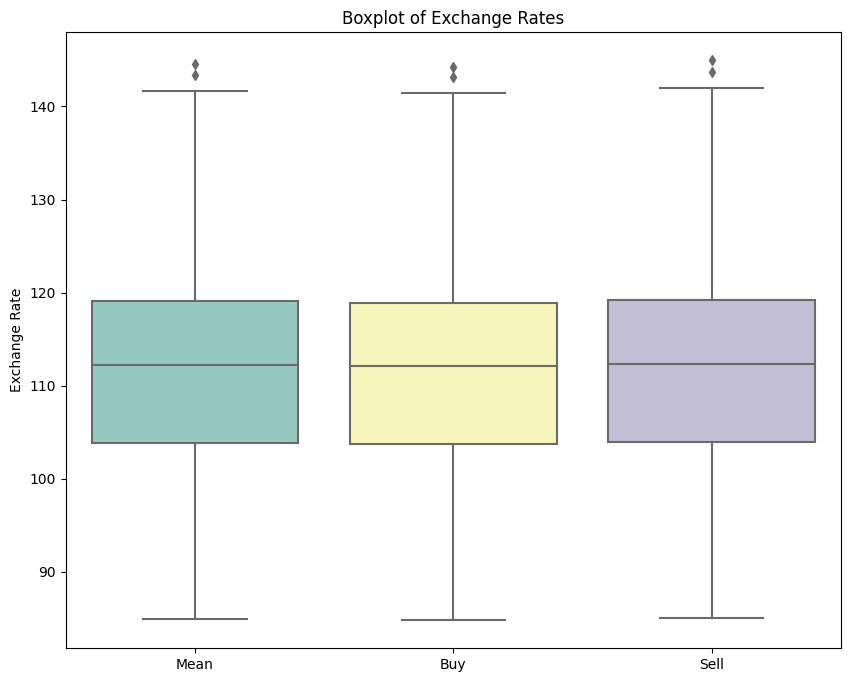

In [5]:
# import neccesary libraries
import seaborn as sns

# create a boxplot for each column
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Mean', 'Buy', 'Sell']], palette='Set3')

# set the plot title and y-axis label
plt.title('Boxplot of Exchange Rates')
plt.ylabel('Exchange Rate')

# show the plot
plt.show()


>No outliers detected

## 3.  Data Visualization
visualize the trend, seasonality, and any other patterns in the data.

### 3.1.Seasonality

In [6]:
# def stationery_display(df,cols):
#     # set figure size
#     plt.figure(figsize=(8, 8))

#     # plot the rolling mean and rolling standard deviation
#     buy = df['Buy']
#     rolmean = buy.rolling(window=12).mean()
#     rolstd = buy.rolling(window=12).std()
#     plt.plot(buy, color='blue', label='Buy')
#     plt.plot(rolmean, color='red', label='Rolling Mean')
#     plt.plot(rolstd, color='black', label='Rolling Std')
#     plt.title('Rolling Mean & Standard Deviation of Buy')
#     plt.xlabel('Date')
#     plt.ylabel('Exchange Rate')
#     plt.legend()

#     # show plot
#     plt.show()
        
# stationery_display(euro,"Mean")        

#### 3.2. Autocorrelation
The ACF plot shows the correlation of the time series with its lagged values. The PACF plot shows the correlation of the time series with its lagged values after removing the effects of the intermediate lags.

Identify the values for p and q: 
* The value of p is the lag at which the PACF plot first crosses the upper confidence interval. 
* The value of q is the lag at which the ACF plot first crosses the upper confidence interval.

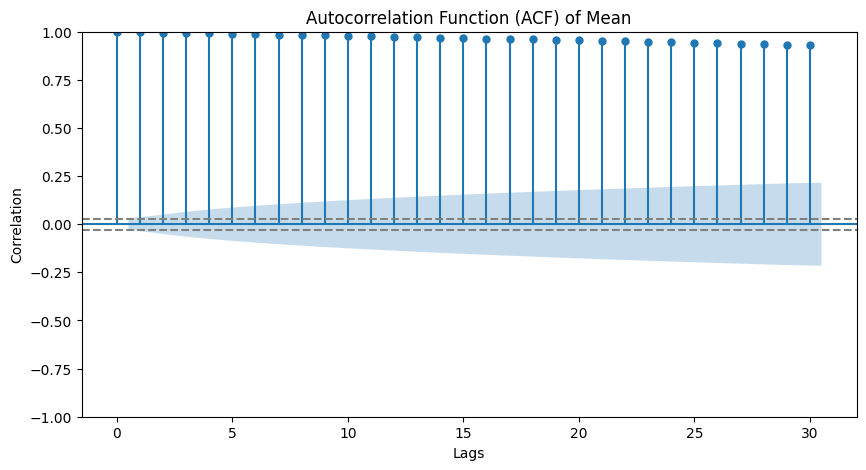

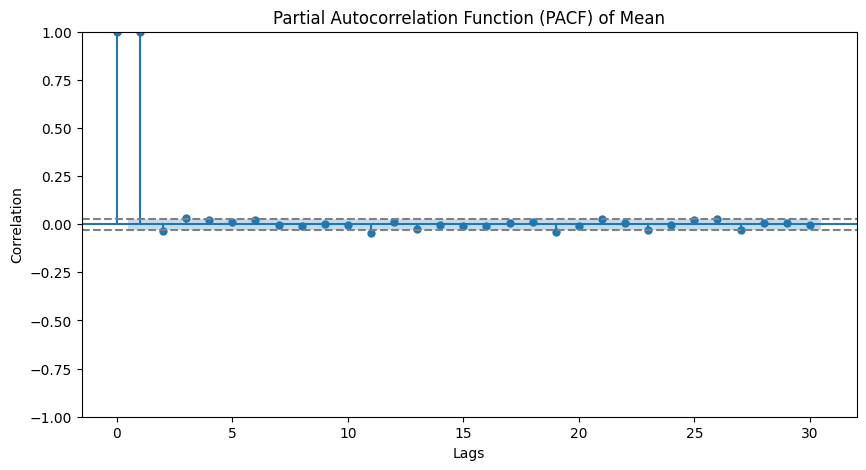

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# increase plot size
plt.rcParams["figure.figsize"] = (10, 5)

# plot ACF
plot_acf(df['Mean'], lags=30)

plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF) of Mean')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

# Plot PACF
plot_pacf(df['Mean'], lags=30)
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF) of Mean')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()


>The ACF plot shows a slow decay, and the PACF plot shows a sharp cutoff after lag p, a first-order difference is needed to make the time series stationary. 

#### 3.3. Stationarity.

####  Stationarity Test

In [8]:
# function to test 
def test_stationarity(series):
    # augmented Dickey-Fuller test
    adf_result = adfuller(series)
    print('Augmented Dickey-Fuller Test:')
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    if adf_result[0] < adf_result[4]['5%']:
        print('ADF test indicates series is stationary')
    else:
        print('ADF test indicates series is non-stationary')

    # kwiatkowski-Phillips-Schmidt-Shin test
    kpss_result = sm.tsa.stattools.kpss(series)
    print('\nKwiatkowski-Phillips-Schmidt-Shin Test:')
    print('KPSS Statistic: %f' % kpss_result[0])
    print('p-value: %f' % kpss_result[1])
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print('\t%s: %.3f' % (key, value))
    if kpss_result[0] < kpss_result[3]['5%']:
        print('KPSS test indicates series is stationary')
    else:
        print('KPSS test indicates series is non-stationary')

# call function
test_stationarity(df['Mean'])        

Augmented Dickey-Fuller Test:
ADF Statistic: -2.562614
p-value: 0.100973
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF test indicates series is non-stationary

Kwiatkowski-Phillips-Schmidt-Shin Test:
KPSS Statistic: 7.023228
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS test indicates series is non-stationary


## 4. Data PreProcessing

In [9]:
# drop currency column
final_df = euro.drop("Currency", axis=1)

#####  Apply Differencing
The time series is non-stationary, apply differencing to make it stationary.I will apply first-order differencing.

In [10]:
# apply first order differencing
diff_y = final_df.diff(periods=1).dropna()

>**After applying differencing, check for stationarity again, and these are results of the Augmented Dickey-Fuller test, the Kwiatkowski-Phillips-Schmidt-Shin test, and the Phillips-Perron test.**

In [11]:
# call function to test stationarity
test_stationarity(diff_y["Mean"])


Augmented Dickey-Fuller Test:
ADF Statistic: -13.476830
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF test indicates series is stationary

Kwiatkowski-Phillips-Schmidt-Shin Test:
KPSS Statistic: 0.048997
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS test indicates series is stationary


## 5. Determine the Parameters

In [12]:
# import neccesary library
from pmdarima.arima import auto_arima

# Find the optimal order of the ARIMA model
model = auto_arima(diff_y["Mean"], seasonal=False, trace=True,
                   suppress_warnings=True, error_action="ignore")
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10521.081, Time=2.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10530.172, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10528.241, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10527.851, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=10519.268, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10521.063, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10527.110, Time=1.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=10514.506, Time=3.86 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=10518.666, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=10514.496, Time=4.48 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=10516.431, Time=6.11 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=10516.431, Time=6.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=10514.979, Time=3.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=10514.899, Time=1.79 sec
 ARIMA(3,0,4)(0,0,0

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## 6. Modelling
### kesur_model

In [13]:
# build the ARIMA model
# AR order
p = None  

# differencing order
d = None  

# MA order
q = None  

kesur_mean = sm.tsa.ARIMA(df['Mean'], order=(2, 0, 3))
kesur_sell = sm.tsa.ARIMA(df['Sell'], order=(2, 0, 3))
kesur_buy = sm.tsa.ARIMA(df['Buy'], order=(1, 0, 3))

# fit the model
mean_results = kesur_mean.fit()
sell_results = kesur_sell.fit()
buy_results = kesur_buy.fit()


### Forcast for Feb 24 2024

In [14]:
euro.head(5)

,Currency,Mean,Buy,Sell
Date,,,,
2023-02-24,EURO,133.9741,133.8476,134.1006
2023-02-23,EURO,134.2924,134.1641,134.4206
2023-02-22,EURO,134.4568,134.3318,134.5818
2023-02-21,EURO,134.5626,134.4388,134.6865
2023-02-20,EURO,133.6065,133.4812,133.7318


In [15]:
# forecast for 1 year
forecast_periods = 12
mean_forecast = mean_results.forecast(steps=forecast_periods)
sell_forecast = sell_results.forecast(steps=forecast_periods)
buy_forecast = buy_results.forecast(steps=forecast_periods)

# print the forecasted values
if len(mean_forecast) > 0:
    print("Mean forecast for April 2024:", mean_forecast.mean())
else:
    print("Error: Mean forecast array is empty")
    
if len(sell_forecast) > 0:
    print("Sell forecast for April 2024:", sell_forecast.mean())
else:
    print("Error: Sell forecast array is empty")

if len(buy_forecast) > 0:
    print("Buy forecast for April 2024:", buy_forecast.mean())
else:
    print("Error: Buy forecast array is empty")


Mean forecast for April 2024: 105.42989198021131
Sell forecast for April 2024: 105.56694373748992
Buy forecast for April 2024: 105.32176691588832


### Tune for Optimised Model

# 7. Evaluation

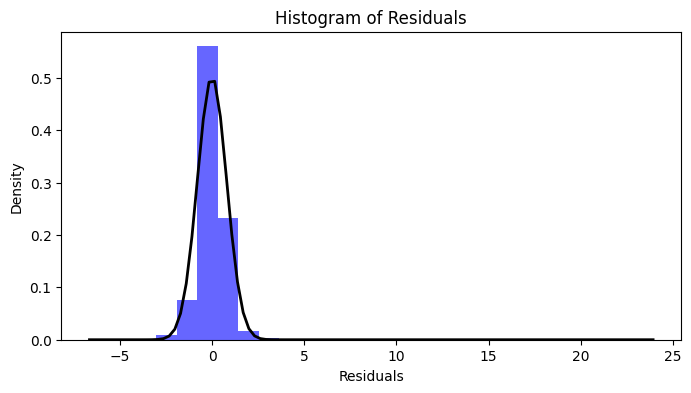

In [16]:
# import neccesary libraries
from scipy import stats

# evaluate the model
residuals = mean_results.resid

# plot histogram of residuals
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(residuals, bins=25, density=True, alpha=0.6, color='b')

# plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
ax.plot(x, p, 'k', linewidth=2)
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Histogram of Residuals')
plt.show()


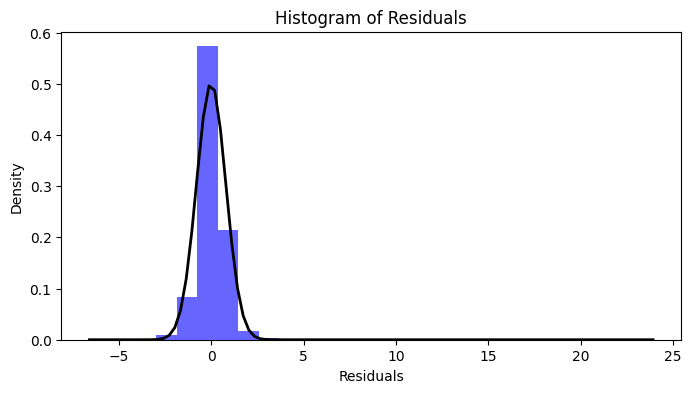

In [17]:
# evaluate the model
residuals = sell_results.resid

# plot histogram of residuals
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(residuals, bins=25, density=True, alpha=0.6, color='b')

# plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
ax.plot(x, p, 'k', linewidth=2)
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Histogram of Residuals')
plt.show()


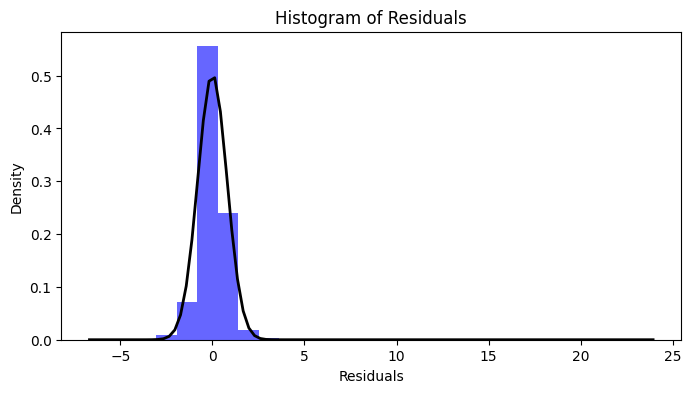

In [18]:
# evaluate the model
residuals = buy_results.resid

# plot histogram of residuals
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(residuals, bins=25, density=True, alpha=0.6, color='b')

# plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
ax.plot(x, p, 'k', linewidth=2)
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Histogram of Residuals')
plt.show()


>residuals are normally distributed